In this notebook we will be loading the images in the training test and validation datasets, then wrangling the image datasets

We will be first loading the libraries that we will need

In [1]:
import cv2
import os
import glob
import matplotlib.pyplot as plt
import numpy as np

After importing the necessary libraries, I need to look at loading all the files. I need to look at the training, test and validation datasets.
Let us look at the training dataset first

In [2]:
training_folder_normal= '/Users/mks9338/Documents/Course/Capstone_three/chest_xray/train/NORMAL/'
training_folder_pneumonia= '/Users/mks9338/Documents/Course/Capstone_three/chest_xray/train/PNEUMONIA/'

We will take the file names from the folder for training pneumonia and normal in a list.

In [3]:
image_paths_normal = glob.glob(training_folder_normal + '*.jpeg')
image_paths_pneumonia = glob.glob(training_folder_pneumonia + '*.jpeg')



In [4]:
print("Number of training images which are normal", len(image_paths_normal))
print("Number of training images which are pneumonia", len(image_paths_pneumonia))


Number of training images which are normal 1341
Number of training images which are pneumonia 3875


We can see that this is an imbalanced dataset with the number of pneumonia images approximately three times that of the normal images. This will need to be corrected before applying any classification model.
We will visualise some of the Normal and pneumonia images from the training dataset 

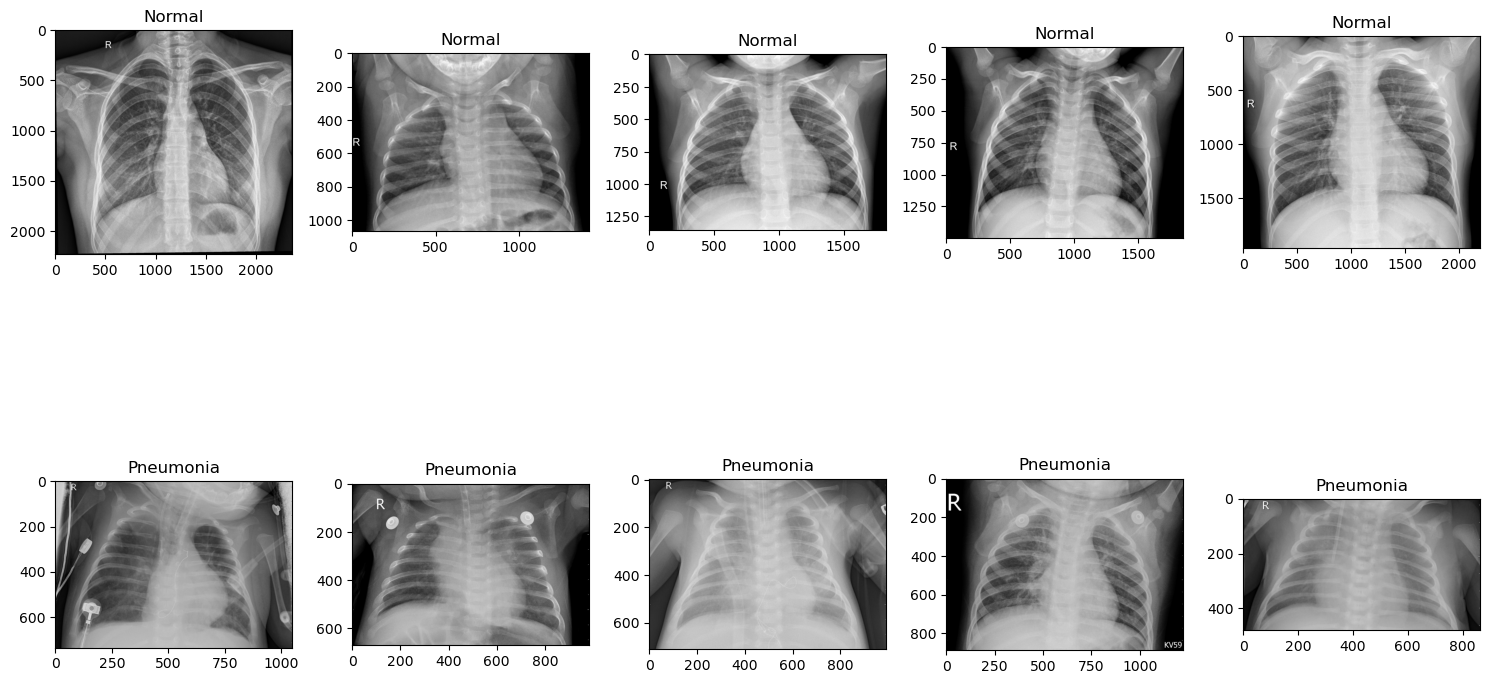

In [5]:
Normal_images=image_paths_normal[0:5]
Pneumonia_images=image_paths_pneumonia[0:5]
Images=Normal_images+Pneumonia_images
cols=5
rows=2
plt.figure(figsize=(15,10))
for i in range(10):
    img=cv2.imread(Images[i])
    plt.subplot(rows,cols,i+1)
    plt.imshow(img)
    if i<5:
        plt.title("Normal")
    else:
        plt.title("Pneumonia")
plt.tight_layout()
plt.show()

You can see based on the axes that the sizes vary from image to image, which means that each of the images is not the same size and the images will have to be resized to make them equal.

We know that the training dataset is imbalanced and will require balancing. We know that the images will have to be resized to make them equal. However, we also have to ensure that the images are grey scaled if not they need to be grey scaled as part of the processing.

We will check whether images require grey scaling based on the dimension of the shape

In [8]:
def grey(x):
    img=cv2.imread(x)
    return len(img)==2

def count_rgb(image_paths):
    count=0
    for path in image_paths:
        if not grey(path):
            count+=1
    return count




In [9]:
count_normal_rgb=count_rgb(image_paths_normal)
print("Number of normal RGB images are {}".format(count_normal_rgb))

count_pneumonia_rgb=count_rgb(image_paths_pneumonia)
print("Number of pneumonia RGB images are {}".format(count_pneumonia_rgb))

Number of normal RGB images are 1341
Number of pneumonia RGB images are 3875


We can see that all of the images will reqire grey scaling

Now as part of our preprocessing, let us see how images will look like if we grey scale and resize them.
We will resize the images to 224x224 which is a standard that is used.

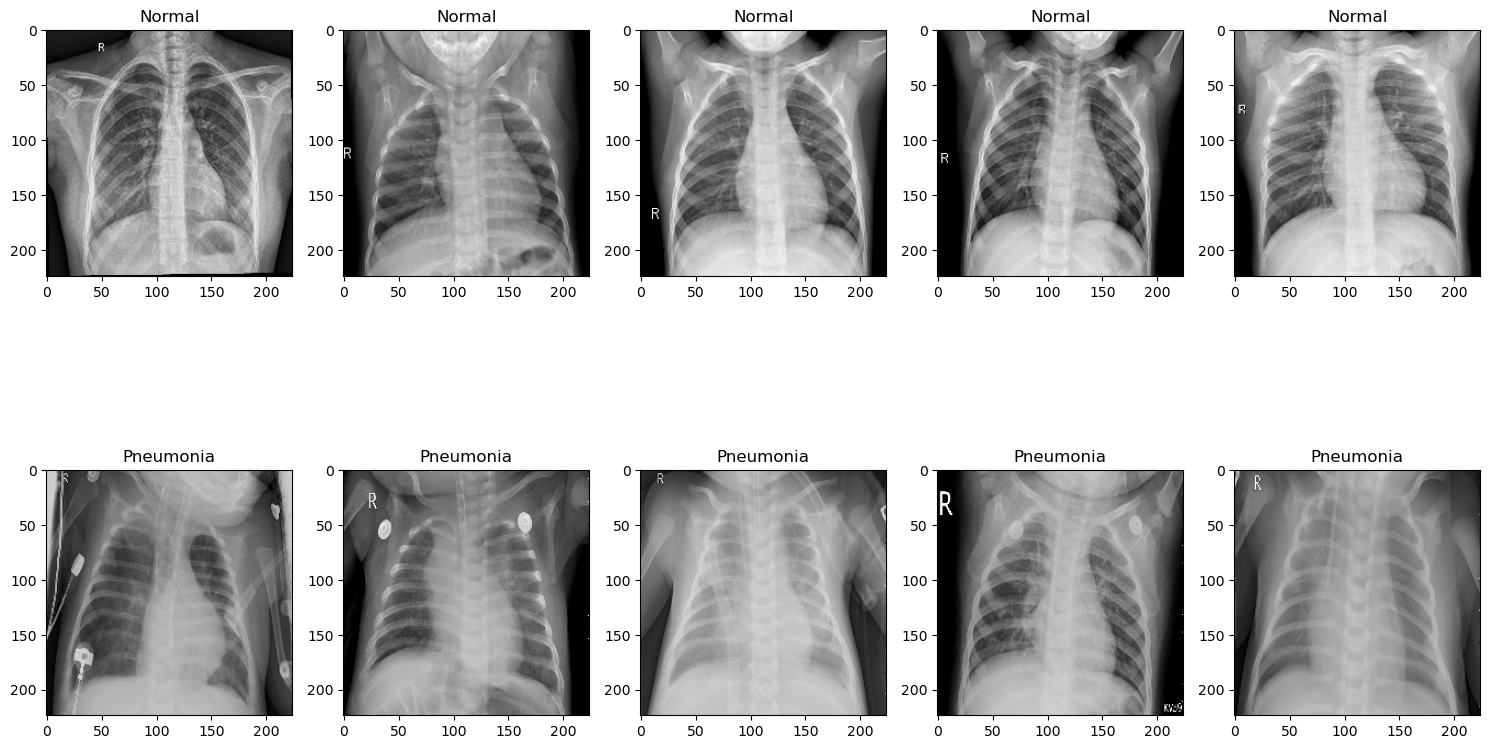

In [10]:
cols=5
rows=2
plt.figure(figsize=(15,10))
for i in range(10):
    img=cv2.imread(Images[i])
    img_resize=cv2.resize(img,(224,224))
    img_gray=cv2.cvtColor(img_resize,cv2.COLOR_BGR2GRAY)
    plt.subplot(rows,cols,i+1)
    plt.imshow(img_gray,cmap="gray")
    if i<5:
        plt.title("Normal")
    else:
        plt.title("Pneumonia")
plt.tight_layout()
plt.show()

Now we will process the training pneumonia and normal case images into numpy arrays after pre-processing all the images to make them suitable for classification

In [11]:

images_normal_training = []

for path in image_paths_normal:
     image = cv2.imread(path)
     img_resize=cv2.resize(image,(224,224))
     img_gray=cv2.cvtColor(img_resize,cv2.COLOR_BGR2GRAY)
     if img_gray is not None:
        images_normal_training.append(img_gray)
     else:
       print(f"Failed to load image: {path}")


In [12]:

images_pneumonia_training = []

for path in image_paths_pneumonia:
     image = cv2.imread(path)
     img_resize=cv2.resize(image,(224,224))
     img_gray=cv2.cvtColor(img_resize,cv2.COLOR_BGR2GRAY)
     if img_gray is not None:
        images_pneumonia_training.append(img_gray)
     else:
       print(f"Failed to load image: {path}")

Print a few lines of the created numpy arrays

In [13]:
print(images_normal_training)

[array([[30, 28, 28, ..., 26, 28,  0],
       [28, 27, 28, ..., 27, 26,  0],
       [28, 27, 28, ..., 28, 27,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8), array([[115,  69,  59, ...,   0,   0,   0],
       [119,  64,  56, ...,   0,   0,   0],
       [122,  58,  53, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), array([[47, 48, 61, ..., 81, 76, 78],
       [45, 47, 61, ..., 82, 83, 79],
       [43, 44, 57, ..., 88, 84, 83],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8), array([[  0,   8,  10, ..., 109, 114, 153],
       [  0,   0,   9, ..., 112, 126, 148],
       [  0,   0,   5, ..., 115, 157, 126],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  

In [14]:
print(images_pneumonia_training)

[array([[206, 206, 206, ..., 196, 205, 213],
       [205, 205, 204, ..., 194, 210, 208],
       [204, 204, 203, ..., 195, 209, 212],
       ...,
       [ 17,  13,  12, ...,  47,  49,  51],
       [ 14,  13,  12, ...,  46,  48,  48],
       [ 14,  13,  12, ...,  45,  46,  46]], dtype=uint8), array([[ 0,  1, 11, ..., 51, 48, 45],
       [ 0,  7, 15, ..., 53, 51, 52],
       [ 1,  9, 17, ..., 51, 56, 53],
       ...,
       [ 0,  0, 26, ...,  0,  0,  0],
       [ 0,  0, 20, ...,  0,  0,  0],
       [ 0,  0, 18, ...,  0,  0,  0]], dtype=uint8), array([[45, 45, 45, ..., 26, 27, 30],
       [45, 45, 44, ..., 25, 26, 28],
       [44, 44, 43, ..., 25, 25, 27],
       ...,
       [46, 46, 45, ..., 52, 54, 60],
       [46, 46, 44, ..., 52, 55, 58],
       [46, 46, 44, ..., 52, 53, 58]], dtype=uint8), array([[ 0,  0,  0, ..., 96, 88, 94],
       [ 0,  0,  0, ..., 94, 85, 87],
       [ 0,  0,  0, ..., 95, 86, 90],
       ...,
       [ 0,  0,  0, ...,  1,  3,  0],
       [ 0,  0,  0, ...,  0,  0,  

Save the pneumonia and normal training image numpy arrays

In [50]:
np.save('images_normal_training.npy', images_normal_training)
np.save('images_pneumonia_training.npy', images_pneumonia_training)

Now we will look at the test and validation datasets to process them 
First let us look at number of images in the test data set.

In [16]:
testing_folder_normal= '/Users/mks9338/Documents/Course/Capstone_three/chest_xray/test/NORMAL/'
testing_folder_pneumonia= '/Users/mks9338/Documents/Course/Capstone_three/chest_xray/test/PNEUMONIA/'
image_paths_normal_test = glob.glob(testing_folder_normal + '*.jpeg')
image_paths_pneumonia_test = glob.glob(testing_folder_pneumonia + '*.jpeg')
print("Number of testing images which are normal", len(image_paths_normal_test))
print("Number of testing images which are pneumonia", len(image_paths_pneumonia_test))

Number of testing images which are normal 234
Number of testing images which are pneumonia 390


Let us preprocess the test dataset.

In [17]:

images_normal_testing = []

for path in image_paths_normal_test :
     image = cv2.imread(path)
     img_resize=cv2.resize(image,(224,224))
     img_gray=cv2.cvtColor(img_resize,cv2.COLOR_BGR2GRAY)
     if img_gray is not None:
        images_normal_testing.append(img_gray)
     else:
       print(f"Failed to load image: {path}")

images_pneumonia_testing = []

for path in image_paths_pneumonia_test:
     image = cv2.imread(path)
     img_resize=cv2.resize(image,(224,224))
     img_gray=cv2.cvtColor(img_resize,cv2.COLOR_BGR2GRAY)
     if img_gray is not None:
        images_pneumonia_testing.append(img_gray)
     else:
       print(f"Failed to load image: {path}")

We can visualise the images for the testing dataset 

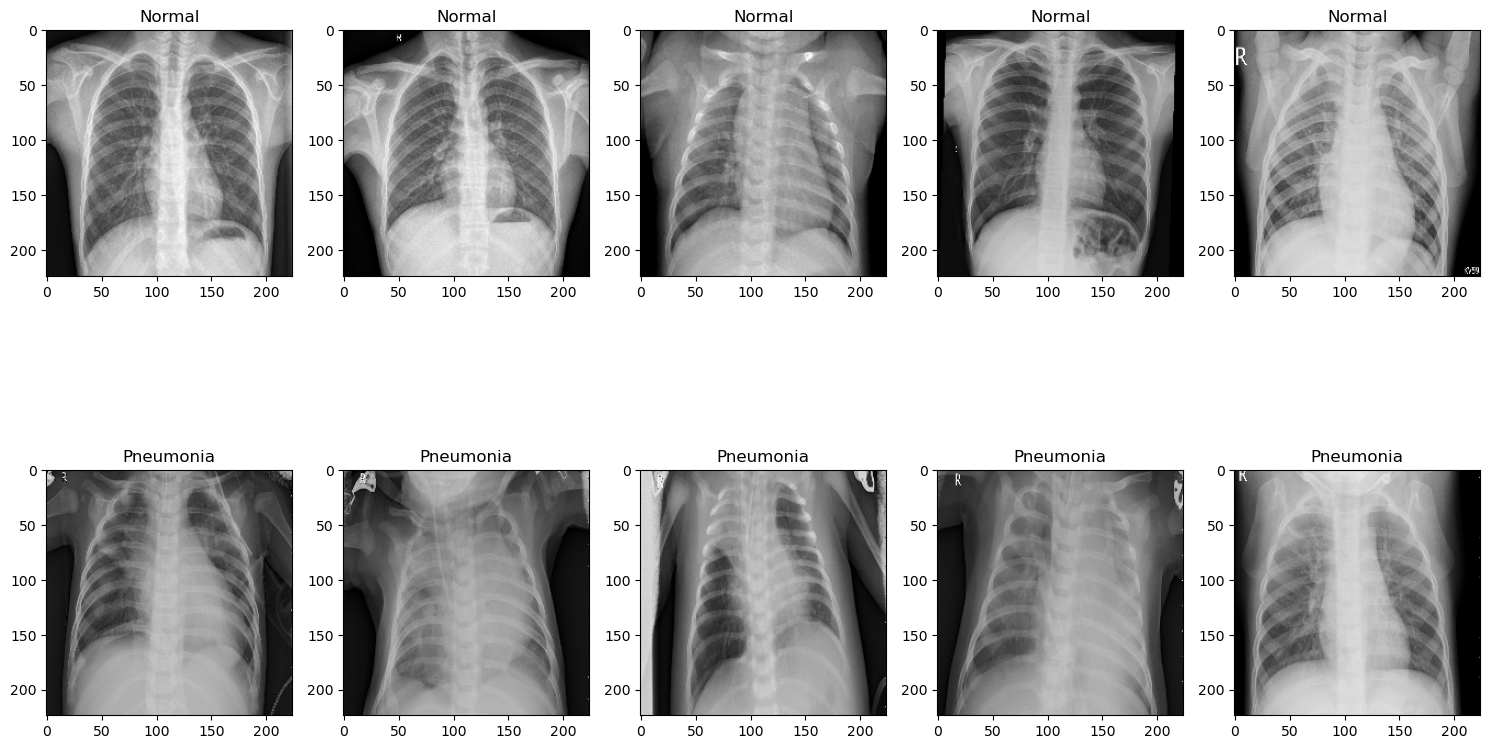

In [18]:
Normal_images_test=image_paths_normal_test[0:5]
Pneumonia_images_test=image_paths_pneumonia_test[0:5]
Images_test=Normal_images_test+Pneumonia_images_test

cols=5
rows=2
plt.figure(figsize=(15,10))
for i in range(10):
    img=cv2.imread(Images_test[i])
    img_resize=cv2.resize(img,(224,224))
    img_gray=cv2.cvtColor(img_resize,cv2.COLOR_BGR2GRAY)
    plt.subplot(rows,cols,i+1)
    plt.imshow(img_gray,cmap="gray")
    if i<5:
        plt.title("Normal")
    else:
        plt.title("Pneumonia")
plt.tight_layout()
plt.show()

Save the testing datasets as numpy arrays

In [53]:
np.save('images_normal_testing.npy', images_normal_testing)
np.save('images_pneumonia_testing.npy', images_pneumonia_testing)

Print out the numpy test arrays

In [21]:
print(images_pneumonia_testing)

[array([[172, 179, 196, ..., 176, 181, 176],
       [ 23,  22, 191, ..., 177, 172, 159],
       [ 30,  15, 202, ..., 166, 156, 162],
       ...,
       [ 24,  27,  23, ...,  24,  24,  24],
       [ 53,  27,  24, ...,  25,  24,  24],
       [ 91,  27,  24, ...,  25,  24,  24]], dtype=uint8), array([[134, 120, 107, ..., 154, 169, 164],
       [140, 130,  99, ..., 146, 173, 158],
       [145, 121, 111, ..., 170, 170, 181],
       ...,
       [ 19,  19,  19, ...,  19,  19,  19],
       [ 19,  19,  19, ...,  19,  19,  19],
       [ 19,  19,  19, ...,  19,  19,  19]], dtype=uint8), array([[223, 220, 218, ..., 147, 185, 179],
       [216, 216, 216, ..., 172, 181, 173],
       [211, 214, 216, ..., 184, 172, 173],
       ...,
       [205, 204, 203, ...,  15,  15,  15],
       [205, 204, 203, ...,  15,  15,  15],
       [205, 204, 203, ...,  15,  15,  15]], dtype=uint8), array([[132, 120, 104, ..., 133, 177, 185],
       [128, 119, 106, ..., 176, 179, 182],
       [127, 126, 109, ..., 173, 179, 

In [19]:
print(images_normal_testing)

[array([[ 25,  22,  22, ...,  66,  80, 116],
       [ 24,  23,  22, ...,  60,  80, 119],
       [ 21,  22,  21, ...,  65,  82, 120],
       ...,
       [ 20,  18,  21, ...,  36,  42,  49],
       [ 20,  20,  18, ...,  32,  39,  49],
       [ 19,  20,  20, ...,  37,  41,  53]], dtype=uint8), array([[1, 2, 4, ..., 6, 3, 5],
       [1, 3, 3, ..., 5, 2, 6],
       [1, 3, 2, ..., 7, 5, 5],
       ...,
       [0, 0, 1, ..., 5, 5, 5],
       [0, 0, 1, ..., 4, 4, 4],
       [0, 0, 1, ..., 5, 4, 5]], dtype=uint8), array([[66, 64, 78, ..., 18, 19,  9],
       [66, 77, 72, ..., 19, 15,  9],
       [73, 72, 59, ..., 22,  7, 29],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8), array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0, 13, ...,  0,  0,  0],
       [ 0,  0, 13, ...,  0,  0,  0],
       [ 0,  0, 13, ...,  0,  0,

There is a validation dataset that has been provided and we should look at 

In [20]:
validation_folder_normal= '/Users/mks9338/Documents/Course/Capstone_three/chest_xray/val/NORMAL/'
validation_folder_pneumonia= '/Users/mks9338/Documents/Course/Capstone_three/chest_xray/val/PNEUMONIA/'
image_paths_normal_validation = glob.glob(validation_folder_normal + '*.jpeg')
image_paths_pneumonia_validation = glob.glob(validation_folder_pneumonia + '*.jpeg')
print("Number of validation images which are normal", len(image_paths_normal_validation))
print("Number of validation images which are pneumonia", len(image_paths_pneumonia_validation))

Number of validation images which are normal 8
Number of validation images which are pneumonia 8


The number of validation images are just too low so we will add them to the testing data images

In [22]:
images_normal_validation = []

for path in image_paths_normal_validation :
     image = cv2.imread(path)
     img_resize=cv2.resize(image,(224,224))
     img_gray=cv2.cvtColor(img_resize,cv2.COLOR_BGR2GRAY)
     if img_gray is not None:
        images_normal_validation.append(img_gray)
     else:
       print(f"Failed to load image: {path}")

images_pneumonia_validation = []

for path in image_paths_pneumonia_validation:
     image = cv2.imread(path)
     img_resize=cv2.resize(image,(224,224))
     img_gray=cv2.cvtColor(img_resize,cv2.COLOR_BGR2GRAY)
     if img_gray is not None:
        images_pneumonia_validation.append(img_gray)
     else:
       print(f"Failed to load image: {path}")

Let us do vertical concatentation of the testing images with the validation images

In [24]:
combined_testing_normal_image = np.concatenate((images_normal_testing,images_normal_validation),axis=0)
combined_testing_pneumonia_image = np.concatenate((images_pneumonia_testing,images_pneumonia_validation),axis=0)

print the arrays to have a look at them

In [26]:
print(combined_testing_pneumonia_image)

[[[172 179 196 ... 176 181 176]
  [ 23  22 191 ... 177 172 159]
  [ 30  15 202 ... 166 156 162]
  ...
  [ 24  27  23 ...  24  24  24]
  [ 53  27  24 ...  25  24  24]
  [ 91  27  24 ...  25  24  24]]

 [[134 120 107 ... 154 169 164]
  [140 130  99 ... 146 173 158]
  [145 121 111 ... 170 170 181]
  ...
  [ 19  19  19 ...  19  19  19]
  [ 19  19  19 ...  19  19  19]
  [ 19  19  19 ...  19  19  19]]

 [[223 220 218 ... 147 185 179]
  [216 216 216 ... 172 181 173]
  [211 214 216 ... 184 172 173]
  ...
  [205 204 203 ...  15  15  15]
  [205 204 203 ...  15  15  15]
  [205 204 203 ...  15  15  15]]

 ...

 [[  2   2   2 ...  14  13   8]
  [  2   2   2 ...  13   9   3]
  [  2   2   2 ...  11   7   1]
  ...
  [  7   7   7 ...   8   8   8]
  [  7   7   7 ...   8   8   8]
  [  7   7   7 ...   8   8   8]]

 [[  0   0   0 ...  54  94 127]
  [  0   0   0 ...  58  71 136]
  [  0   0   0 ...  58  81 137]
  ...
  [  2   2   2 ...   2   2   2]
  [  2   2   2 ...   2   2   2]
  [  2   2   2 ...   2   2  

In [25]:
print(combined_testing_normal_image)

[[[ 25  22  22 ...  66  80 116]
  [ 24  23  22 ...  60  80 119]
  [ 21  22  21 ...  65  82 120]
  ...
  [ 20  18  21 ...  36  42  49]
  [ 20  20  18 ...  32  39  49]
  [ 19  20  20 ...  37  41  53]]

 [[  1   2   4 ...   6   3   5]
  [  1   3   3 ...   5   2   6]
  [  1   3   2 ...   7   5   5]
  ...
  [  0   0   1 ...   5   5   5]
  [  0   0   1 ...   4   4   4]
  [  0   0   1 ...   5   4   5]]

 [[ 66  64  78 ...  18  19   9]
  [ 66  77  72 ...  19  15   9]
  [ 73  72  59 ...  22   7  29]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 ...

 [[149   4 183 ... 173   2   2]
  [  0   1   0 ...   7   2   0]
  [112   0  70 ...   5   3   1]
  ...
  [  0   0   0 ...   8   8   6]
  [  2   0   0 ...   1   2   0]
  [  3   0   0 ... 172   2   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  2   3   3 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0  

Save as numpy arrays

In [27]:
np.save('images_normal_testing_new.npy', combined_testing_normal_image)
np.save('images_pneumonia_testing_new.npy', combined_testing_pneumonia_image)